In [1]:
1+1

2

Орел выпал 40 раз, решка 20. Отличается ли вероятность выпадения решки и орла?
А если
Просто расчитывать разность квадратных отклонений ожидаемых и наблюдаемых частот - не самая хорошая идея,потому что нужно держать в голове, чему в принципе равнялось ожидаемое значение величины = нужно поделить на корень ожидаемого значения частоты.
(Потому что флуктуация от наблюдаемого значения вокруг ожидаемого значения частоты пропорциональна корню из ожидаемого значения частоты)
Расстояние хи^2 Пирсона:

In [2]:
def monet(N):
    arr = np.random.randint(2, size=N)
    tail = 0
    eagle = 0
    for i in arr:
        if i == 0:
            tail+=1
        else:
            eagle+=1
    df = pd.DataFrame({
        'Решка': [tail, tail/2],
        'Орел': [eagle, eagle/2]
    }, index=['O','E'])
    st, p = stats.chisquare([tail,eagle])
    if p < 0.05:
        print('Отклоняем H0')
    else:
        print('Принимаем H0')
    return df, st, p



Монах Грегор Иоганн выращивал горох трех цветов (бедняга надеялся, что это поможет ему сделать важное открытие).
В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:
18,55,27
Чему будут равны ожидаемые значения частот, если предполагаемое теоретическое распределение имеет следующий вид:
1:2:1

In [3]:
ter_rasp_1 = (18+55+27)/4
ter_rasp_2 = (18+55+27)/2
print("expected = ",ter_rasp_1,ter_rasp_2,ter_rasp_1)

expected =  25.0 50.0 25.0


Рассчитайте расстояние хи-квадрат и введите получившееся значение с точностью хотя бы до одной цифры после запятой.

In [11]:
from scipy.stats import chisquare
ods= (18,55,27)
expected = (25.0, 50.0, 25.0)
chisquare(ods,expected)

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

Ваши ставки! Как будет выглядеть распределение расстояния хи-квадрат в нашем эксперименте с монеткой при многократном повторении эксперимента (при условии, что верна нулевая гипотеза).

Представьте, что мы при каждом повторении эксперимента рассчитываем расстояние хи - квадрат и в итоге строим гистограмму получившихся значений.

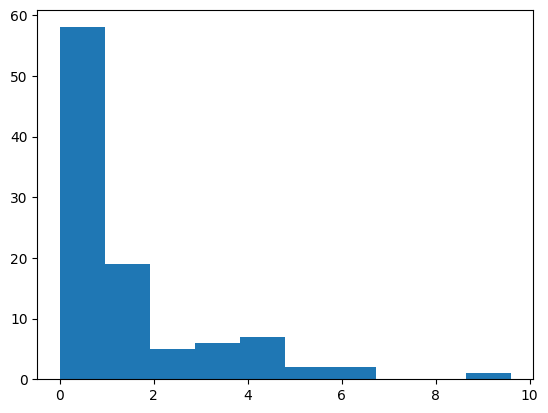

In [13]:
import random
import matplotlib.pyplot as plt

y = []
for i in range(100):

    x = []
    for i in range(60):
        x.append(random.randint(0, 1))

    y.append((x.count(0) - 30)**2 / 30 + (x.count(1) - 30)**2 / 30)
plt.hist(y)
plt.show()

Распределение хи-квадрат с k степенями свободы это распределение суммы квадратов независимых стандартных нормальных случайных величин.

*Критическое значение*

In [14]:
from scipy.stats.distributions import chi2
chi2.ppf(df=2, q=0.95)

5.991464547107979

*Степени свободы*

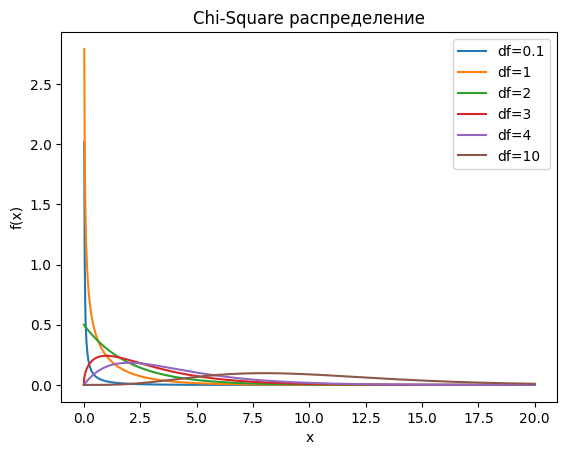

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Define degrees of freedom
dfs = [0.1, 1, 2, 3, 4, 10]

# Define x
x = np.linspace(0, 20, 1000)

# Plot the graphs
for df in dfs:
    plt.plot(x, chi2.pdf(x, df), label=f'df={df}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Chi-Square распределение')
plt.legend()
plt.show()

Я думаю, вы уловили идею, как рассчитать число степеней свободы для общего случая! Предположим, что мы теперь тестируем гипотезу о том, что наша игральная кость с шестью гранями абсолютно честная, и каждая грань выпадает с одинаковой частотой. Мы сделали 100 бросков и зафиксировали наблюдаемые частоты. Укажите число степеней свободы распределения хи-квадрат, которое мы получим в таком случае!
--Число степеней свободы для распределения хи-квадрат в общем случае равно количеству категорий (граней) минус один. В нашем случае, если мы считаем, что каждая грань выпадает с одинаковой частотой, то число категорий равно шести. Таким образом, число степеней свободы будет равно 6 - 1 = 5.

Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?

In [20]:
from scipy.stats import chi2

# Число степеней свободы
df = 2

# Найдем долю наблюдений, лежащих в диапазоне от 2 до 4
prob = chi2.cdf(4, df) - chi2.cdf(2, df)

print(f'Доля наблюдений, лежащих в диапазоне от 2 до 4, равна {prob}')

Доля наблюдений, лежащих в диапазоне от 2 до 4, равна 0.23254415793482963


Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки):

10,10,10,5,10,15

Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного. В поле для ответа введите получившийся p-уровень значимости

*Расчет p - value*

In [21]:
from scipy.stats import chisquare

# Наблюдаемые частоты
observed_freq = [10, 10, 10, 5, 10, 15]

# Ожидаемые частоты
expected_freq = [sum(observed_freq)/6]*6

# Вычисляем p-value
chi2_stat, p_val = chisquare(observed_freq, expected_freq)

print(f'p-value: {p_val}')

p-value: 0.41588018699550794


Вернемся к нашему примеру с политическими партиями! Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий. Введите в поле для ответа получившееся значение статистики хи-квадрат с точностью хотя бы до одной цифры после запятой.

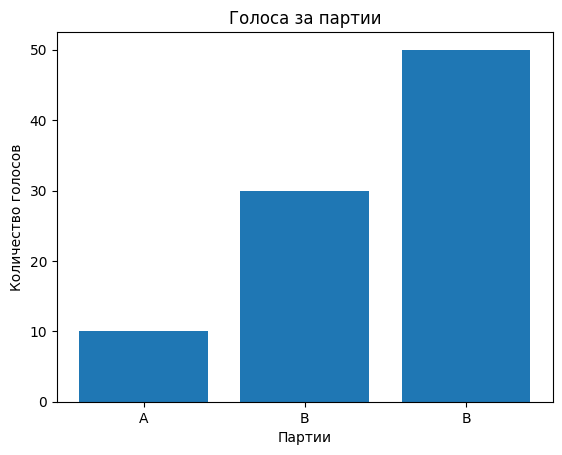

In [31]:
import matplotlib.pyplot as plt

# Данные
parties = ['A', 'B', 'В']
votes = [10, 30, 50]

# Построение графика
plt.bar(parties, votes)
plt.xlabel('Партии')
plt.ylabel('Количество голосов')
plt.title('Голоса за партии')
plt.show()

In [32]:
import numpy as np
from scipy.stats import chisquare

# Наблюдаемое распределение
observed_values = np.array([10, 30, 50])
# Ожидаемое распределение
expected_ratio = np.array([1, 1, 1])

expected_values = expected_ratio * observed_values.sum() / expected_ratio.sum()
print(f'Ожидаемые значения частот: {", ".join(map(str, map(int, expected_values)))}')

# Проведение хи-квадрат теста
chi2, p_value = chisquare(f_obs=observed_values, f_exp=expected_values)
print(f'P-значение: {p_value}')
print(f'Хи-квадрат статистика: {chi2}')

Ожидаемые значения частот: 30, 30, 30
P-значение: 1.61959679231261e-06
Хи-квадрат статистика: 26.666666666666668


Проинтерпретируем  полученный результат:
p < 0,05. Отклоняем нулевую гипотезу

Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей не отличается от равномерного в генеральной совокупности биоинформатиков!

In [36]:
import scipy.stats as stats

# Число юношей и девушек
male = 15
female = 9

# Общее число студентов
total = male + female

# Ожидаемая частота для юношей и девушек
expected = total / 2

# Наблюдаемые частоты
observed = [male, female]

# Вычисляем критерий хи-квадрат Пирсона
chi2, p = stats.chisquare(observed, [expected, expected])

print(f'Критерий хи-квадрат Пирсона: {chi2}')
print(f'P-value: {p}')

Критерий хи-квадрат Пирсона: 1.5
P-value: 0.22067136191984324


В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб за информационными коммуникациями между гражданами. Однако ﻿его поступок вызвал неоднозначную реакцию в обществе. Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50. Найдите p-уровень значимости для проверки этой гипотезы.

In [37]:
import scipy.stats as stats

# Общее число опрошенных
total = 1500

# Число положительных ответов
positive = 53/100 * total

# Число отрицательных ответов
negative = total - positive

# Ожидаемая частота для положительных и отрицательных ответов
expected = total / 2

# Наблюдаемые частоты
observed = [positive, negative]

# Вычисляем критерий хи-квадрат Пирсона
chi2, p = stats.chisquare(observed, [expected, expected])

print(f'Критерий хи-квадрат Пирсона: {chi2}')
print(f'P-value: {p}')

Критерий хи-квадрат Пирсона: 5.4
P-value: 0.020136751550346325


*Анализ таблиц сопряженности*

|               | Юноши | Девушки |
|---------------|-------|---------|
| Биологи       | 15    | 9       |
| Информатики = | 11    | 6       |
Две номинативные переменные пол и профессия, обе с двумя градациями.
Нулевая гипотеза - распределение не отличается от ожидаемого.
Альтернативная гипотеза – распределение отличается или иными словами: две переменные взаимосвязаны между собой

Расчет ожидаемых значений

|               | Юноши | Девушки | Всего |
|---------------|-------|---------|-------|
| Биологи       | 15    | 9       | 24    |
| Информатики = | 11    | 6       | 17    |
| Всего         | 26    | 15      | 41    |

Юношей 26 человек из 41 – 63.4 %
Девушек 15 человек из 41 – 36.6 %
Примем нулевую гипотезу, что профессия никак не связана с полом, тогда юноши должны с равной частотой наблюдаться у информатиков и биологов.
63.4 % от 24 и 17 составляют 15.2 и 10.8 соответственно.
36.6 % от 24 и 17 составляет 8.8 и 6.2 соответственно.

**Расчет критерия**

In [45]:
import scipy.stats as sps
sps.contingency.expected_freq(([15, 9], [11, 6]))
chi2 = chi2_contingency(observed_values)
print(chi2)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[15.2195122,  8.7804878],
       [10.7804878,  6.2195122]]))


В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.


|                           | Первая градация фактора Х | Вторая градация фактора Х |
|---------------------------|---------------------------|---------------------------|
| Первая градация фактора Y | 10                        | 6                         |
| Вторая градация фактора Y | 5                         | 15                        |

In [39]:
import scipy.stats as sps

sps.contingency.expected_freq(([10, 6], [5, 15]))

array([[ 6.66666667,  9.33333333],
       [ 8.33333333, 11.66666667]])

**Критерий χ2 - Пирсона**
Проверяет гипотезу о том, что наблюдаемое распределение номинативной переменной отличается от ожидаемого.
Для одной номинативной переменной df = n – 1, где n - количество столбцов таблицы.
Для таблиц сопряженности df = (n – 1) * (m – 1), где n - количество столбцов таблицы, m – число строк таблицы.
Все наблюдения независимы
Минимальное количество наблюдений в каждой из ячеек должно быть больше 5

**Поправка Йетса**

В теории распределение χ2 непрерывно, тогда как вычисляемые  значения всегда дискретны, в результате Ho может отвергаться слишком часто. Чтобы скорректировать значения p - уровня значимости применяется поправка Йетса на непрерывность.
*Обычно применяется, когда некоторые ожидаемые частоты меньше 10.*

При проверке гипотезы о взаимосвязи двух номинативных переменных мы можем принять альтернативную гипотезу, если в таблице есть значимые отклонения между наблюдаемыми и ожидаемыми значениями хотя бы в некоторых ячейках

Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу

|                | Мужчины | Женщины |
|----------------|---------|---------|
| Тормозят       | 20      | 15      |
| Притормаживают | 11      | 12      |
| Не тормозят    | 7       | 9       |

In [49]:
import scipy.stats as sps
chi2, p_value, dof, ev = stats.chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p - value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



При проверке гипотезы о взаимосвязи двух номинативных переменных с двумя градациями (таблица сопряженности два на два), если на самом деле верна нулевая гипотеза и никакой взаимосвязи между переменными в генеральной совокупности нет, то справедливы следующие утверждения:

*Распределение статистики хи-квадрат будет обладать значительной асимметрией

*Число степеней свободы будет равняться одному

Нельзя ли снизить риск тромбоза назначением небольших
доз аспирина (160 мг/сут)?

|         | Есть тромбоз | Нет тромбоза |
|---------|--------------|--------------|
| Плацебо | 18           | 7            |
| Аспирин | 6            | 13           |


In [52]:
from scipy import stats
import numpy as np

observed = np.array([[18, 7], [6, 13]])
chi2, p, df, expected = stats.chi2_contingency(observed)
print ('x-squared =', chi2,
       'p-value =', p,
       'df =', df)


x-squared = 5.57719298245614 p-value = 0.018195864430772903 df = 1


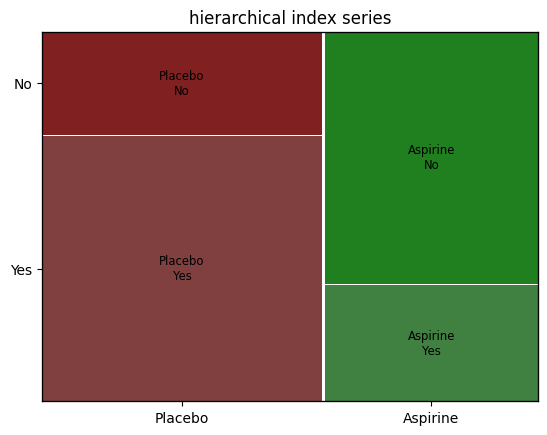

In [60]:
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

**Точный критерий Фишера**


|             | Поправился | Не поправился |
|-------------|------------|---------------|
| Лекарство 1 | 3          | 1             |
| Лекарство 2 | 1          | 3             |

In [62]:
odds_ratio, pvalue = stats.fisher_exact([[1, 3], [3, 1]])  # odds_ratio- отношение шансов
print(p_value)

0.6205162173513055


In [63]:
from itertools import combinations

def C(n, k):
    return len(list(combinations(range(n), k)))

def CF (a, b, c, d):
    n = a + b + c + d
    return C(a + b, a) * C(c + d, c) / C(n, a + c)

a, b, c, d = 4, 0, 0, 4
c1 = CF (a, b, c, d)
print ("c1=", round(c1, 3))

a, b, c, d = 1, 3, 3, 1
c2 = CF (a, b, c, d)
print ("c2=", round(c2, 3))

print("cf =", round((c1 + c2) * 2, 3))

#Или/и

a, b, c, d = 3, 1, 1, 3
c3 = CF (a, b, c, d)
print ("c3=", round(c3, 3))

a, b, c, d = 0, 4, 4, 0
c4 = CF (a, b, c, d)
print ("c4=", round(c4, 3))

print("cf =", round((c1 + c2 + c3 + c4), 3))

c1= 0.014
c2= 0.229
cf = 0.486
c3= 0.229
c4= 0.014
cf = 0.486


**Логистическая регрессия. Постановка задачи**

In [ ]:
1) Предположим, мы подбросили монетку 100 раз, и 70 раз выпал орел. Чему равняется натуральный логарифм шансов выпадения решки?
р(Орел) = 0,7
р(Решка) = 0,3
Шанс - отношение вероятности успеха к вероятности неудачи (удача - решка)
odds(Решка) = 0,3/0,7

In [64]:
np.log(30/70)

-0.8472978603872037

2) Предположим, что мы получили логарифм шансов выпадения решки, равный -1. Тогда вероятность выпадения решки равняется:

In [65]:
p = -1
print(np.exp(p)/(1+np.exp(p)))

0.2689414213699951


Рассчитайте логарифм шанса, того что случайно выбранный человек из нашей выборки окажется биологом.

In [67]:
print(np.log(24/(41-24)))

0.3448404862917296


Модель без предикторов. Intercept only model

Intercept - натуральный логарифм шансов положительного исхода.
Чтобы рассчитать шанс положительного исхода, нужно расчитать экспоненту значения intercept.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


df = pd.read_csv('titanic.csv')
df.Survived.value_counts()
np.log(342/549)
glm_binom2 = smf.glm(formula="Survived ~ 1",
                     data=df, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()
np.exp(-0.4732877044469254) / (1 + np.exp(-0.4732877044469254))

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

С помощью логистической регрессии без предикторов мы захотели узнать, правда ли, что сдавая Анатолию Дмитриевичу, легче провалить экзамен, чем сдать. В нашей выборке было 50 студентов. Часть из них сдала экзамен (положительный исход), а часть - нет (отрицательный исход). Свободный член нашей регрессии оказался равен -0.8472979. Сколько человек всё-таки сдало экзамен?

In [75]:
intercept= -0.8472979
p =1-(1/(1+math.exp(intercept)))
p * 50


14.999999584065637

**Модель с двумя номинативными предикторами**

Потренируемся считать количество коэффициентов в модели. Сколько коэффициентов (включая интерцепт) будет в логистической регрессии, в которой мы предсказываем вероятность победы футбольной команды по тому, играет она дома или в гостях, а также по тому, в рамках какого турнира проводится игра (регулярный чемпионат, кубок страны или лига чемпионов) без взаимодействия предикторов?

1. Интерцепт: Дома - Регулярный чемпионат
2. В гостях vs Интерцепт
3. Кубок страны  vs Интерцепт
4. Лига чемпионов vs Интерцепт

После того как вы восстановили формулу регрессии в предыдущем примере, рассчитайте с её помощью вероятность снять головную боль после приёма настоящего лекарства мужчиной.

Ответ укажите с точностью хотя бы до двух значащих цифр
1. x = (интерцепт) + (эффект принадлежности к мужскому полу) + (эффект лечения) + (эффект лечения у мужчин)
2. exp(x)/(1+exp(x))

In [82]:
Intercept=-1.15
SexMale= 1
ConditionPlacebo= 0
ConditionTreatment= 1
SexMale_ConditionPlacebo= 0
SexMale_ConditionTreatment= 1
x= Intercept+0.8*SexMale +0.82*ConditionPlacebo+2.13*ConditionTreatment+16.11*SexMale_ConditionPlacebo-0.17*SexMale_ConditionTreatment
p = math.exp(x)/(1+math.exp(x))
p

0.8334113864245404

Астрологи объявили, что в ближайшем будущем нас ждёт месяц получения дипломов. Давайте проверим предсказания астрологов и построим логистическую регрессию, в которой будем предсказывать вероятность получить красный диплом по полу и знаку зодиака. Сколько коэффициентов (включая intercept и взаимодействия факторов) получится в нашей  модели?

1 коэффициент - интерсепт (пол1 + знак зодиака1)
1 коэффициент - пол2
11 коэффициентов -- знак зодиака2 - знак зодиака12
11 коэффициентов -- пол2*знак зодиака2 -- -- пол2 * знак зодиака12.

# Когда нужно использовать непараметрические методы и почему?

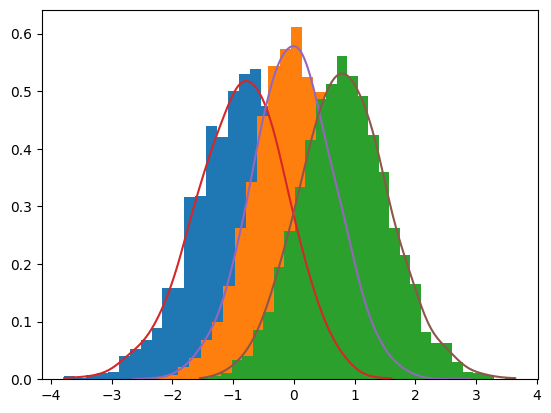

In [83]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt



def get_gaussian_density(dataset):
    ''' Гауссово распределение, полученное на основе выборки

        :param dataset: массив значений
    '''

    density = ss.gaussian_kde(dataset)
    density.covariance_factor = lambda : 0.25
    density._compute_covariance()

    min_x, max_x = np.percentile(dataset, [0, 100])

    return np.linspace(min_x, max_x, 200), density




mu, sigma = 0, 1 # Среднее и стандартное отклонение
rnd = np.random.normal(mu, sigma, 10000)  # Выборка случайно распределенной величины


# Случайно выбираем по 3 пробы, сортируем их
random_samples = (
  sorted(np.random.choice(rnd, 3))
  for i in range(10000)
)

# Zip функция - без комментариев (функциональное программирование, есть на Вики)
# на выходе получаем массивы минимальных, средних и максимальных значений
rnd1, rnd2, rnd3 = zip(*random_samples)


# Гистограмма частот распределения случайной величины (опционально)
counts_1, x_range_1, ignored = plt.hist(rnd1, 30, density=True, histtype='barstacked')
counts_2, x_range_2, ignored = plt.hist(rnd2, 30, density=True, histtype='barstacked')
counts_3, x_range_3, ignored = plt.hist(rnd3, 30, density=True, histtype='barstacked')


# Гауссова оценка плотности ядра (приближение к гладкой функции)
x1, linear_1 = get_gaussian_density(rnd1)
x2, linear_2 = get_gaussian_density(rnd2)
x3, linear_3 = get_gaussian_density(rnd3)


plt.plot(x1, linear_1(x1))
plt.plot(x2, linear_2(x2))
plt.plot(x3, linear_3(x3))


plt.show()

In [4]:
# Питонистам важно понимать как каждый из рассматриваемых методов реализуется на Питоне

from sklearn.cluster import KMeans
import numpy as np

# Запишем координаты точек в виде массива numpy
X = np.array([[-3, 3], [1, 4], [2, 6], [3, 8], [5, 2], [6, 11], [7, 1]])
# Обучим модель KMeans на нашем массиве с одним кластером
kmeans = KMeans(n_clusters=1).fit(X)
# Выведем координаты центроида данного кластера
print(kmeans.cluster_centers_)
# Выведем сумму квадратов расстояний точек от центроида = аттрибут модели kmeans
print(kmeans.inertia_)

C:\Users\elavrukhina\PycharmProjects\Stepik_statistic\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[3. 5.]]
146.0
